# Imports

In [1]:
import numpy as np
import os
import sys
import pickle
import scipy
import pandas as pd

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import nodalStrength as ns
import normalize as norm

# Set Directory Paths

In [3]:
# Directory path to load formatted Pathology Data
%store -r path_dataDir
# Directory path to load formatted Thickness At Path Data
%store -r thickAtPath_dataDir
# Directory path to save Calcualted Analysis Data
%store -r thickAtPath_CalData
# Directory path to save Figures
%store -r thickAtPath_Fig
# Directory path to load preconstructed Atlas Data
%store -r baseDir

%store -r path_CalData

# Loading

## Loading the preconstructed atlas data

In [4]:
# loads the preconstructed Atlas data
NetworkDataGeneral = scipy.io.loadmat(os.path.join(baseDir, 'NetworkAnalysisGeneral', 'FTDGeneralData_20221114.mat'))

## Loading Matching between Thickness Regions (400) to Pathology Regions (40)

In [5]:
with open(os.path.join(path_dataDir, 'pathToAtlasIndex.pkl'), 'rb') as f:
    pathToAtlasIndex = pickle.load(f)
f.close()

### Missing Index (=few observations) from Pathology Dataset

#### TAU 

In [6]:
# TAU_missing_index
with open(os.path.join(path_CalData, 'TAU_missing_index.pkl'), 'rb') as f:
    TAU_missing_index = pickle.load(f)
f.close()

#### TDP

In [7]:
# TDP_missing_index
with open(os.path.join(path_CalData, 'TDP_missing_index.pkl'), 'rb') as f:
    TDP_missing_index = pickle.load(f)
f.close()

## Thickness Data At Pathology Regions

### Loading Thickness Values at Pathology Regions / TAU, TDP --> Dropped

In [8]:
# HCthicknessAtPath
with open(os.path.join(thickAtPath_dataDir, 'HCthicknessAtPath.pkl'), 'rb') as f:
    HCthicknessAtPath = pickle.load(f)
f.close()

# TAUthicknessAtPath_Drop
with open(os.path.join(thickAtPath_dataDir, 'TAUthicknessAtPath_Drop.pkl'), 'rb') as f:
    TAUthicknessAtPath_Drop = pickle.load(f)
f.close()

# TDPthicknessAtPath_Drop
with open(os.path.join(thickAtPath_dataDir, 'TDPthicknessAtPath_Drop.pkl'), 'rb') as f:
    TDPthicknessAtPath_Drop = pickle.load(f)
f.close()

### Loading Thickness Values at Pathology Regions - Z Score / TAU, TDP --> Dropped

In [9]:
# HCthicknessAtPath_z
with open(os.path.join(thickAtPath_CalData, 'HCthicknessAtPath_z.pkl'), 'rb') as f:
    HCthicknessAtPath_z = pickle.load(f)
f.close()

# TAUthicknessAtPath_z_Drop
with open(os.path.join(thickAtPath_CalData, 'TAUthicknessAtPath_z_Drop.pkl'), 'rb') as f:
    TAUthicknessAtPath_z_Drop = pickle.load(f)
f.close()

# TDPthicknessAtPath_z_Drop
with open(os.path.join(thickAtPath_CalData, 'TDPthicknessAtPath_z_Drop.pkl'), 'rb') as f:
    TDPthicknessAtPath_z_Drop = pickle.load(f)
f.close()

### Loading Thickness Values at Pathology Regions - W Score / TAU, TDP --> Dropped

In [10]:
# HCthicknessAtPath_w
with open(os.path.join(thickAtPath_CalData, 'HCthicknessAtPath_w.pkl'), 'rb') as f:
    HCthicknessAtPath_w = pickle.load(f)
f.close()

# TAUthicknessAtPath_w_Drop
with open(os.path.join(thickAtPath_CalData, 'TAUthicknessAtPath_w_Drop.pkl'), 'rb') as f:
    TAUthicknessAtPath_w_Drop = pickle.load(f)
f.close()

# TDPthicknessAtPath_w_Drop
with open(os.path.join(thickAtPath_CalData, 'TDPthicknessAtPath_w_Drop.pkl'), 'rb') as f:
    TDPthicknessAtPath_w_Drop = pickle.load(f)
f.close()

## Volume Data At Pathology Regions

### Loading Volume at Pathology Regions / TAU, TDP --> Dropped

In [11]:
# HCVolumeAtPath
with open(os.path.join(thickAtPath_dataDir, 'HCVolumeAtPath.pkl'), 'rb') as f:
    HCVolumeAtPath = pickle.load(f)
f.close()

# TAUVolumeAtPath_Drop
with open(os.path.join(thickAtPath_dataDir, 'TAUVolumeAtPath_Drop.pkl'), 'rb') as f:
    TAUVolumeAtPath_Drop = pickle.load(f)
f.close()

# TDPVolumeAtPath_Drop
with open(os.path.join(thickAtPath_dataDir, 'TDPVolumeAtPath_Drop.pkl'), 'rb') as f:
    TDPVolumeAtPath_Drop = pickle.load(f)
f.close()

### Loading Volume at Pathology Regions - Z Score / TAU, TDP --> Dropped

In [12]:
# HCVolumeAtPath_z
with open(os.path.join(thickAtPath_CalData, 'HCVolumeAtPath_z.pkl'), 'rb') as f:
    HCVolumeAtPath_z = pickle.load(f)
f.close()

# TAUVolumeAtPath_z_Drop
with open(os.path.join(thickAtPath_CalData, 'TAUVolumeAtPath_z_Drop.pkl'), 'rb') as f:
    TAUVolumeAtPath_z_Drop = pickle.load(f)
f.close()

# TDPVolumeAtPath_z_Drop
with open(os.path.join(thickAtPath_CalData, 'TDPVolumeAtPath_z_Drop.pkl'), 'rb') as f:
    TDPVolumeAtPath_z_Drop = pickle.load(f)
f.close()

### Loading Volume at Pathology Regions - W Score / TAU, TDP --> Dropped

In [13]:
# HCVolumeAtPath_w
with open(os.path.join(thickAtPath_CalData, 'HCVolumeAtPath_w.pkl'), 'rb') as f:
    HCVolumeAtPath_w = pickle.load(f)
f.close()

# TAUVolumeAtPath_w_Drop
with open(os.path.join(thickAtPath_CalData, 'TAUVolumeAtPath_w_Drop.pkl'), 'rb') as f:
    TAUVolumeAtPath_w_Drop = pickle.load(f)
f.close()

# TDPVolumeAtPath_w_Drop
with open(os.path.join(thickAtPath_CalData, 'TDPVolumeAtPath_w_Drop.pkl'), 'rb') as f:
    TDPVolumeAtPath_w_Drop = pickle.load(f)
f.close()

## Thickness At Path Covariance Matrices - Dictionaries (Original, Z, W Score) / TAU, TDP --> Dropped

In [14]:
# cov_thickAtPath_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_thickAtPath_dict_Drop.pkl'), 'rb') as f:
    cov_thickAtPath_dict_Drop = pickle.load(f)
f.close()

# cov_thickAtPath_z_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_thickAtPath_z_dict_Drop.pkl'), 'rb') as f:
    cov_thickAtPath_z_dict_Drop = pickle.load(f)
f.close()

# cov_thickAtPath_w_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_thickAtPath_w_dict_Drop.pkl'), 'rb') as f:
    cov_thickAtPath_w_dict_Drop = pickle.load(f)
f.close()

## Volume At Path Covariance Matrices - Dictionaries (Original, Z, W Score) / TAU, TDP --> Dropped

In [15]:
# cov_volAtPath_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_volAtPath_dict_Drop.pkl'), 'rb') as f:
    cov_volAtPath_dict_Drop = pickle.load(f)
f.close()

# cov_volAtPath_z_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_volAtPath_z_dict_Drop.pkl'), 'rb') as f:
    cov_volAtPath_z_dict_Drop = pickle.load(f)
f.close()

# cov_volAtPath_w_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_volAtPath_w_dict_Drop.pkl'), 'rb') as f:
    cov_volAtPath_w_dict_Drop = pickle.load(f)
f.close()

# Draw Nodal Strength vs Thickness Values

## Thickness At Path Data - Original

In [12]:
thickAtPathOrg = np.concatenate((np.nanmean(HCthicknessAtPath, axis=0), 
                np.nanmean(TAUthicknessAtPath_Drop, axis=0), 
                np.nanmean(TDPthicknessAtPath_Drop, axis=0)))

ymin = np.min(thickAtPathOrg)
ymax = np.max(thickAtPathOrg)

### HC

<Figure size 640x480 with 0 Axes>

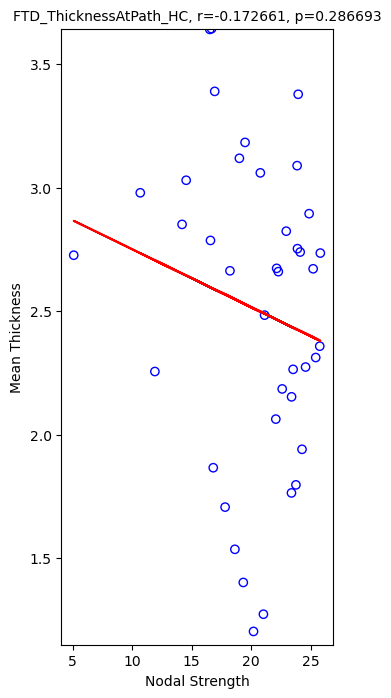

In [13]:
ns.nonZeroDegCorr(HCthicknessAtPath, cov_thickAtPath_dict_Drop["HC"], ymin, ymax,
                  'FTD_ThicknessAtPath_HC', 'Nodal Strength', 'Mean Thickness', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_ThicknessAtPath_Orig_(HC)', 
                  linear_regression = True)

### TAU

<Figure size 640x480 with 0 Axes>

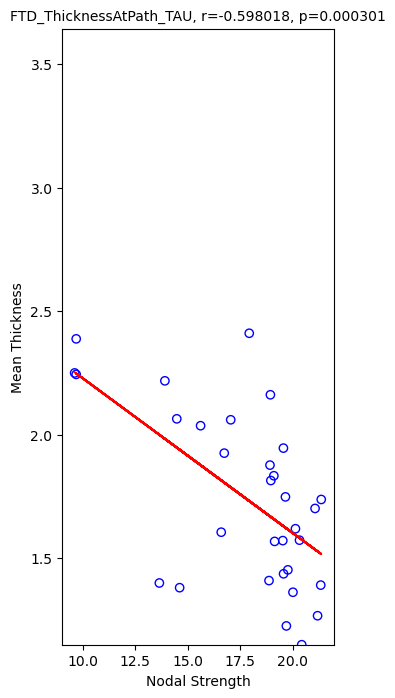

In [14]:
ns.nonZeroDegCorr(TAUthicknessAtPath_Drop, cov_thickAtPath_dict_Drop["TAU"], ymin, ymax,
                  'FTD_ThicknessAtPath_TAU', 'Nodal Strength', 
                  'Mean Thickness', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_ThicknessAtPath_Orig_(TAU)', 
                  linear_regression = True)

### TDP

<Figure size 640x480 with 0 Axes>

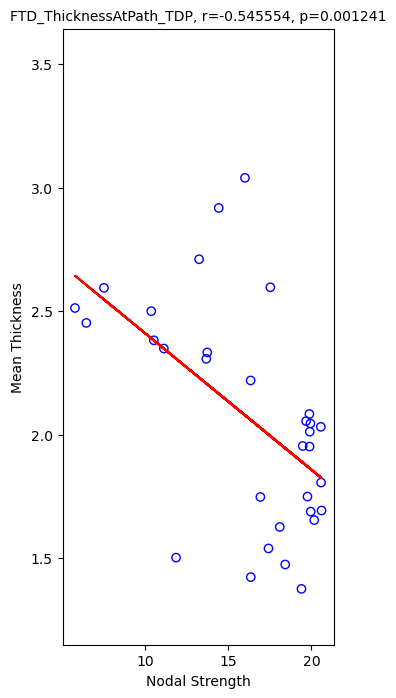

In [15]:
ns.nonZeroDegCorr(TDPthicknessAtPath_Drop, cov_thickAtPath_dict_Drop["TDP"], ymin, ymax,
                  'FTD_ThicknessAtPath_TDP', 'Nodal Strength', 
                  'Mean Thickness', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_ThicknessAtPath_Orig_(TDP)', 
                  linear_regression = True)

## Thickness Data - Z Score

In [16]:
thickAtPathZ = np.concatenate((np.nanmean(HCthicknessAtPath_z, axis=0), 
                                 np.nanmean(TAUthicknessAtPath_z_Drop, axis=0), 
                                 np.nanmean(TDPthicknessAtPath_z_Drop, axis=0)))

ymin = np.min(thickAtPathZ)
ymax = np.max(thickAtPathZ)

### HC

<Figure size 640x480 with 0 Axes>

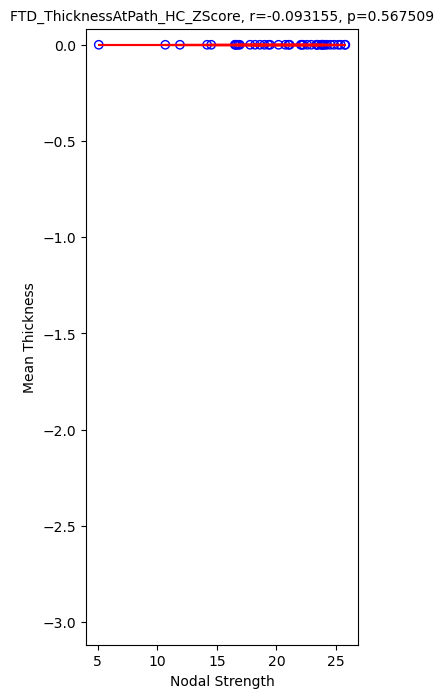

In [17]:
ns.nonZeroDegCorr(HCthicknessAtPath_z, cov_thickAtPath_z_dict_Drop["HC"], ymin, ymax,
                  'FTD_ThicknessAtPath_HC_ZScore', 'Nodal Strength', 
                  'Mean Thickness', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_ThicknessAtPath_ZScore_(HC)', 
                  linear_regression = True)

### TAU

<Figure size 640x480 with 0 Axes>

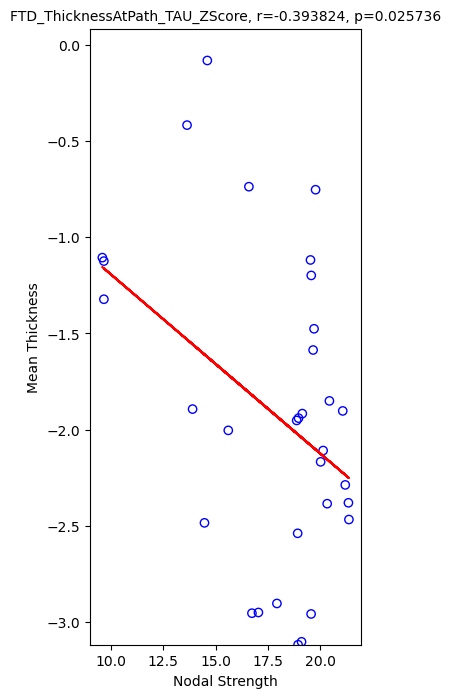

In [18]:
ns.nonZeroDegCorr(TAUthicknessAtPath_z_Drop, cov_thickAtPath_z_dict_Drop["TAU"], ymin, ymax,
                  'FTD_ThicknessAtPath_TAU_ZScore', 
                  'Nodal Strength', 'Mean Thickness', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_ThicknessAtPath_ZScore_(TAU)', 
                  linear_regression = True)

### TDP

<Figure size 640x480 with 0 Axes>

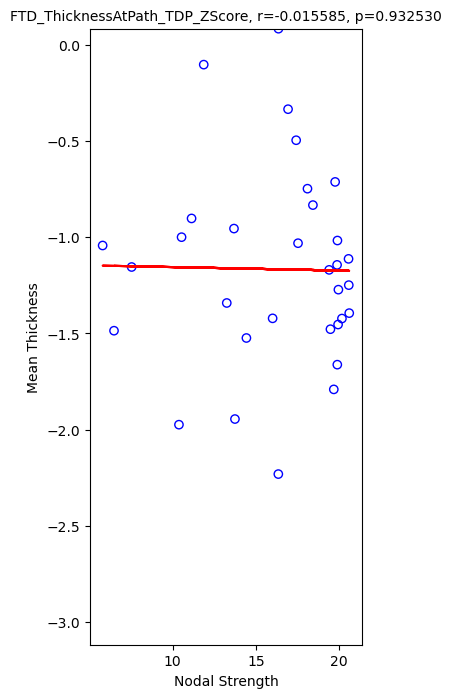

In [19]:
ns.nonZeroDegCorr(TDPthicknessAtPath_z_Drop, cov_thickAtPath_z_dict_Drop["TDP"], ymin, ymax,
                  'FTD_ThicknessAtPath_TDP_ZScore', 
                  'Nodal Strength', 'Mean Thickness', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_ThicknessAtPath_ZScore_(TDP)', 
                  linear_regression = True)

## Thickness Data - W Score

In [20]:
thickAtPathW = np.concatenate((np.nanmean(HCthicknessAtPath_w, axis=0), 
                                 np.nanmean(TAUthicknessAtPath_w_Drop, axis=0), 
                                 np.nanmean(TDPthicknessAtPath_w_Drop, axis=0)))

ymin = np.min(thickAtPathW)
ymax = np.max(thickAtPathW)

### HC

<Figure size 640x480 with 0 Axes>

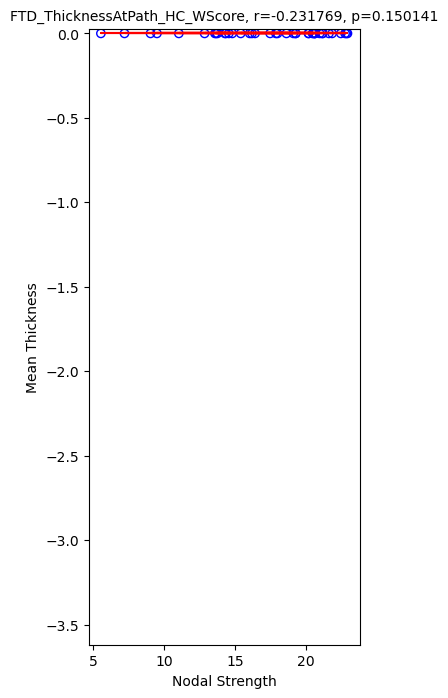

In [21]:
ns.nonZeroDegCorr(HCthicknessAtPath_w, cov_thickAtPath_w_dict_Drop["HC"], ymin, ymax,
                  'FTD_ThicknessAtPath_HC_WScore', 
                  'Nodal Strength', 'Mean Thickness', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_ThicknessAtPath_WScore_(HC)', 
                  linear_regression = True)

### TAU

<Figure size 640x480 with 0 Axes>

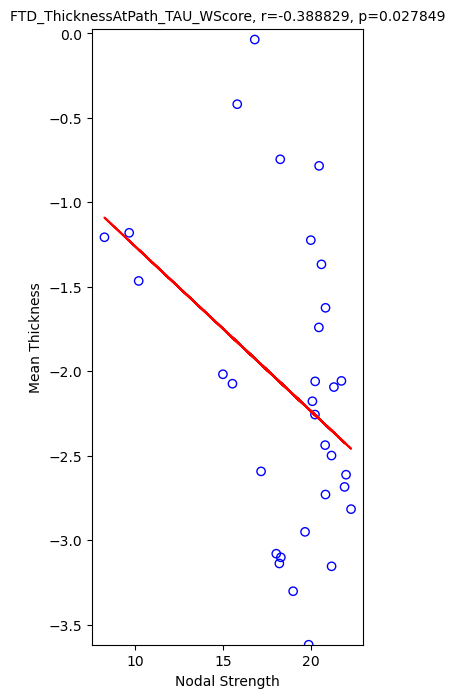

In [22]:
ns.nonZeroDegCorr(TAUthicknessAtPath_w_Drop, cov_thickAtPath_w_dict_Drop["TAU"], ymin, ymax,
                  'FTD_ThicknessAtPath_TAU_WScore', 
                  'Nodal Strength', 'Mean Thickness', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_ThicknessAtPath_WScore_(TAU)', 
                  linear_regression = True)

### TDP

<Figure size 640x480 with 0 Axes>

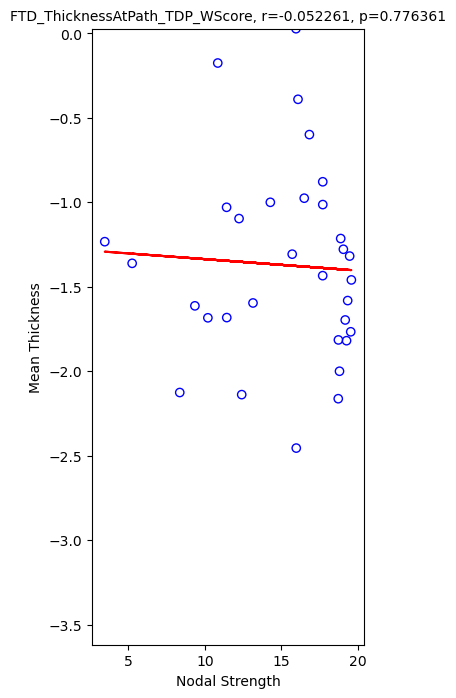

In [23]:
ns.nonZeroDegCorr(TDPthicknessAtPath_w_Drop, cov_thickAtPath_w_dict_Drop["TDP"], ymin, ymax,
                  'FTD_ThicknessAtPath_TDP_WScore', 
                  'Nodal Strength', 'Mean Thickness', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_ThicknessAtPath_WScore_(TDP)', 
                  linear_regression = True)

# Draw Nodal Strength vs  Volume Values

## Volume Data - Original

In [24]:
volAtPathOrig = np.concatenate((np.nanmean(HCVolumeAtPath, axis=0), 
                                 np.nanmean(TAUVolumeAtPath_Drop, axis=0), 
                                 np.nanmean(TDPVolumeAtPath_Drop, axis=0)))

ymin = np.min(volAtPathOrig)
ymax = np.max(volAtPathOrig)

### HC

<Figure size 640x480 with 0 Axes>

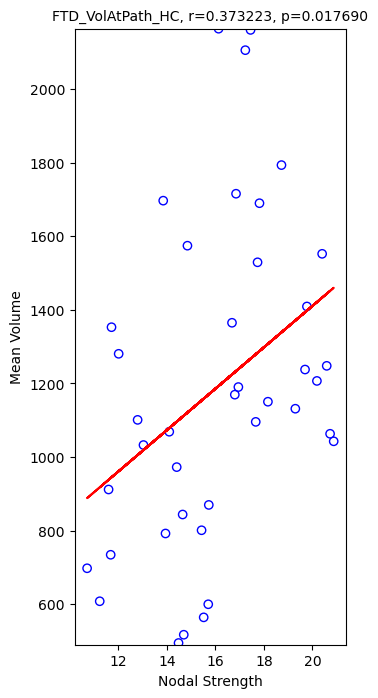

In [25]:
ns.nonZeroDegCorr(HCVolumeAtPath, cov_volAtPath_dict_Drop["HC"], ymin, ymax,
                  'FTD_VolAtPath_HC', 'Nodal Strength', 
                  'Mean Volume', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_VolAtPath_Orig_(HC)', 
                  linear_regression = True)

### TAU

<Figure size 640x480 with 0 Axes>

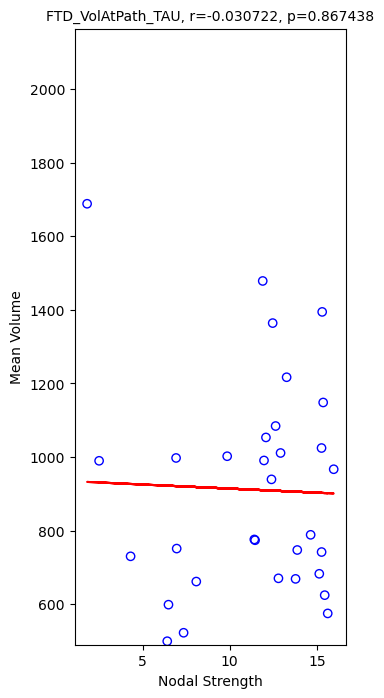

In [26]:
ns.nonZeroDegCorr(TAUVolumeAtPath_Drop, cov_volAtPath_dict_Drop["TAU"], ymin, ymax,
                  'FTD_VolAtPath_TAU', 'Nodal Strength', 
                  'Mean Volume', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_VolAtPath_Orig_(TAU)', 
                  linear_regression = True)

### TDP

<Figure size 640x480 with 0 Axes>

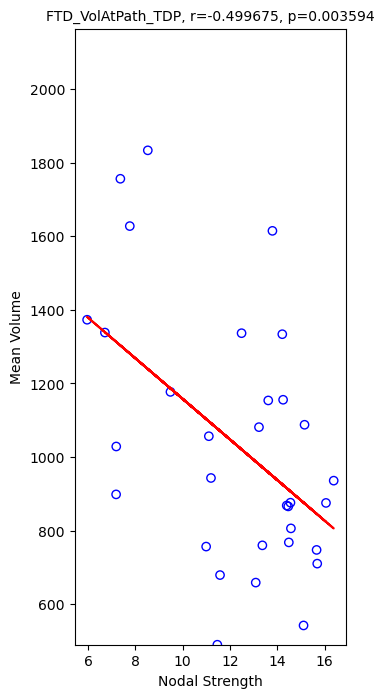

In [27]:
ns.nonZeroDegCorr(TDPVolumeAtPath_Drop, cov_volAtPath_dict_Drop["TDP"], ymin, ymax,
                  'FTD_VolAtPath_TDP', 'Nodal Strength', 
                  'Mean Volume', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_VolAtPath_Orig_(TDP)', 
                  linear_regression = True)

## Volume Data - Z Score

In [28]:
volAtPathZ = np.concatenate((np.nanmean(HCVolumeAtPath_z, axis=0), 
                                 np.nanmean(TAUVolumeAtPath_z_Drop, axis=0), 
                                 np.nanmean(TDPVolumeAtPath_z_Drop, axis=0)))

ymin = np.min(volAtPathZ)
ymax = np.max(volAtPathZ)

### HC

<Figure size 640x480 with 0 Axes>

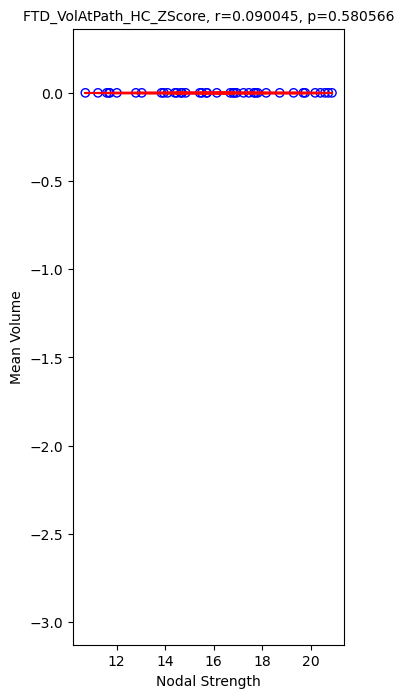

In [29]:
ns.nonZeroDegCorr(HCVolumeAtPath_z, cov_volAtPath_z_dict_Drop["HC"], ymin, ymax,
                  'FTD_VolAtPath_HC_ZScore', 'Nodal Strength', 
                  'Mean Volume', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_VolAtPath_ZScore_(HC)', 
                  linear_regression = True)

### TAU

<Figure size 640x480 with 0 Axes>

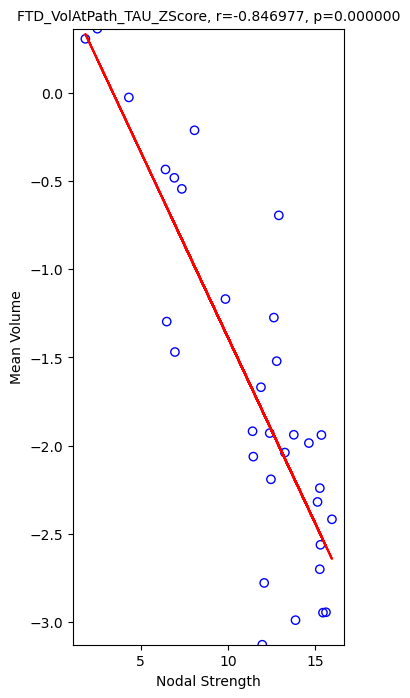

In [30]:
ns.nonZeroDegCorr(TAUVolumeAtPath_z_Drop, cov_volAtPath_z_dict_Drop["TAU"], ymin, ymax,
                  'FTD_VolAtPath_TAU_ZScore', 
                  'Nodal Strength', 'Mean Volume', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_VolAtPath_ZScore_(TAU)', 
                  linear_regression = True)

### TDP

<Figure size 640x480 with 0 Axes>

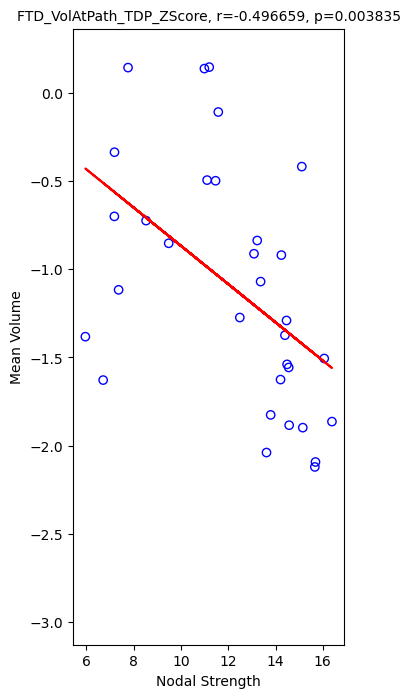

In [31]:
ns.nonZeroDegCorr(TDPVolumeAtPath_z_Drop, cov_volAtPath_z_dict_Drop["TDP"], ymin, ymax,
                  'FTD_VolAtPath_TDP_ZScore', 
                  'Nodal Strength', 'Mean Volume', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_VolAtPath_ZScore_(TDP)', 
                  linear_regression = True)

## Volume Data - W Score

In [18]:
volAtPathW = np.concatenate((np.nanmean(HCVolumeAtPath_w, axis=0), 
                                 np.nanmean(TAUVolumeAtPath_w_Drop, axis=0), 
                                 np.nanmean(TDPVolumeAtPath_w_Drop, axis=0)))

ymin = np.min(volAtPathW)
ymax = np.max(volAtPathW)

### HC

<Figure size 640x480 with 0 Axes>

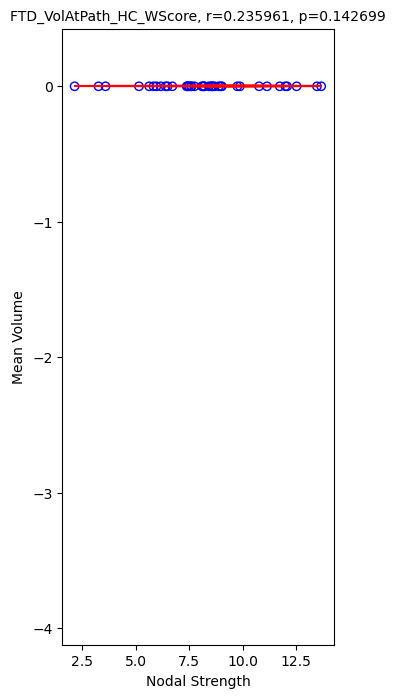

In [19]:
ns.nonZeroDegCorr(HCVolumeAtPath_w, cov_volAtPath_w_dict_Drop["HC"], ymin, ymax,
                  'FTD_VolAtPath_HC_WScore', 'Nodal Strength', 
                  'Mean Volume', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_VolAtPath_WScore_(HC)', 
                  linear_regression = True)

### TAU

In [ ]:
ns.nonZeroDegCorr(TAUVolumeAtPath_w_Drop, cov_volAtPath_w_dict_Drop["TAU"], ymin, ymax,
                  'FTD_VolAtPath_TAU_WScore', 
                  'Nodal Strength', 'Mean Volume', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_VolAtPath_WScore_(TAU)', 
                  linear_regression = True)

### TDP

<Figure size 640x480 with 0 Axes>

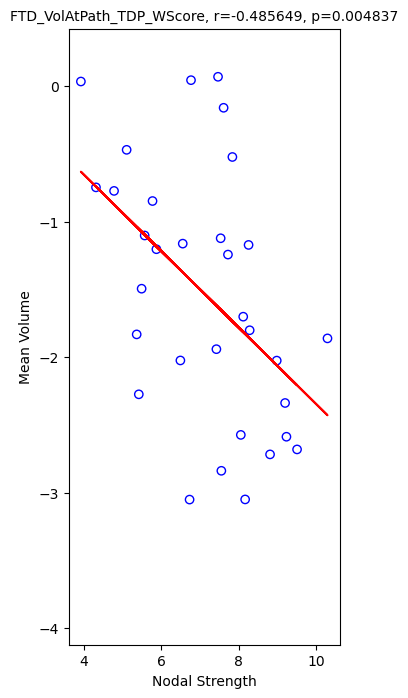

In [20]:
ns.nonZeroDegCorr(TDPVolumeAtPath_w_Drop, cov_volAtPath_w_dict_Drop["TDP"], ymin, ymax,
                  'FTD_VolAtPath_TDP_WScore', 
                  'Nodal Strength', 'Mean Volume', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_VolAtPath_WScore_(TDP)', 
                  linear_regression = True)

## Volume Data - W Score (Close vs Far)

### Brain Meshes as connection

#### cdata: Maps Vertices to one of 400 Thickness Regions

In [21]:
cdata = (NetworkDataGeneral['NetworkDataGeneral'][0, 0]['Schaefer400x7']['GII'][0, 0]['cdata'][0,0].astype('int')) - 1
cdata = cdata.flatten()

#### Get Atlas TriSurf Vertices and Faces

In [22]:
mesh_vertices = NetworkDataGeneral['NetworkDataGeneral'][0, 0]['Schaefer400x7']['GII'][0, 0]['giiSurface_Both'][0,0]['vertices'][0, 0]
mesh_faces = NetworkDataGeneral['NetworkDataGeneral'][0, 0]['Schaefer400x7']['GII'][0, 0]['giiSurface_Both'][0,0]['faces'][0, 0] - 1

#### Combine cdata and Verticies

In [23]:
atlas_df = pd.DataFrame({'cdata': cdata, 'V_xcoord': mesh_vertices[:, 0], 'V_ycoord': mesh_vertices[:, 1], 
                         'V_zcoord': mesh_vertices[:, 2]})

### Order the Dataframe on cdata (Thickness Labels)

In [24]:
atlas_df = atlas_df.sort_values(by='cdata')

In [25]:
atlas_df

,cdata,V_xcoord,V_ycoord,V_zcoord
255707,-1,-26.942810,-39.990990,-0.779830
69820,-1,24.625675,-21.147724,-11.566458
69821,-1,28.241968,-21.849840,-10.817587
69822,-1,27.312641,-21.998621,-10.929002
69823,-1,28.705273,-22.399506,-10.630835
...,...,...,...,...
10264,399,9.728673,-52.066856,47.326614
115305,399,9.098806,-54.652821,45.514191
115304,399,9.140291,-54.583580,45.944508
50315,399,6.342167,-48.039028,50.252068


### Generate 1 Connection Adjacency Matrix for Thickness Regions (400x400)

In [26]:
%%time
thick_adj_matrix_1 = np.zeros((400, 400), dtype = int)

for face in mesh_faces: # for each face
    for i in range(3): # For each pair of vertice indices (total of 3 pairs)
        v1 = face[i] # Vertice 1
        v2 = face[(i + 1) % 3] # Vertice 2
        
        # Get the thickness label for each of the vertices
        v1_thickLabel = atlas_df.loc[v1]['cdata'].astype('int')
        v2_thickLabel = atlas_df.loc[v2]['cdata'].astype('int')
        
        # Update the Adjacency matrix
        thick_adj_matrix_1[v1_thickLabel, v2_thickLabel] = 1
        thick_adj_matrix_1[v2_thickLabel, v1_thickLabel] = 1

CPU times: user 54.4 s, sys: 101 ms, total: 54.5 s
Wall time: 54.4 s


In [27]:
thick_adj_matrix_1

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [28]:
thick_adj_matrix_1.shape

(400, 400)

## Generate 2 Connection Adjacency Matrix for Thickness Regions (400x400)

In [29]:
thick_adj_matrix_2 = np.dot(thick_adj_matrix_1,thick_adj_matrix_1) # Get 2 connection adj mat by squaring
thick_adj_matrix_2 = np.where(thick_adj_matrix_2 > 0, 1, 0) # Convert postive values to 1.

In [30]:
thick_adj_matrix_2

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 1]])

## Generate 3 Connection Adjacency Matrix for Thickness Regions (400x400)

In [31]:
thick_adj_matrix_3 = np.linalg.matrix_power(thick_adj_matrix_1, 3) # Get 3 connection adj mat by cube
thick_adj_matrix_3 = np.where(thick_adj_matrix_3 > 0, 1, 0) # Convert postive values to 1.

In [32]:
thick_adj_matrix_3

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

## Generate 4 Connection Adjacency Matrix for Thickness Regions (400x400)

In [33]:
thick_adj_matrix_4 = np.linalg.matrix_power(thick_adj_matrix_1, 4) # Get 4 connection adj mat 
thick_adj_matrix_4 = np.where(thick_adj_matrix_4 > 0, 1, 0) # Convert postive values to 1.

In [34]:
thick_adj_matrix_4

array([[1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

## Generate 5 Connection Adjacency Matrix for Thickness Regions (400x400)

In [35]:
thick_adj_matrix_5 = np.linalg.matrix_power(thick_adj_matrix_1, 5) # Get 5 connection adj mat
thick_adj_matrix_5 = np.where(thick_adj_matrix_5 > 0, 1, 0) # Convert postive values to 1.

In [36]:
thick_adj_matrix_5

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

### pathToAtlasIndex_list

list of len 40. Each element denoting the array of indices mapping Thickness Region to Pathology Region

In [37]:
pathToAtlasIndex_list = []

for i in range(len(pathToAtlasIndex)):
    curr_l = pathToAtlasIndex[i][0]
    pathToAtlasIndex_list.append(curr_l)

for i in range(len(pathToAtlasIndex)):
    curr_r = pathToAtlasIndex[i][1]
    pathToAtlasIndex_list.append(curr_r)

### Drop The regions with insufficient number of observations from Pathology Log %AO

#### TAU

In [38]:
pathToAtlasIndex_list_TAU = pathToAtlasIndex_list.copy()

for i in TAU_missing_index[::-1]:
    del pathToAtlasIndex_list_TAU[i]

#### TDP

In [39]:
pathToAtlasIndex_list_TDP = pathToAtlasIndex_list.copy()

for i in TDP_missing_index[::-1]:
    del pathToAtlasIndex_list_TDP[i]

### Using Brain Mesh Adjacency Matrix, find close & far regions for each Pathology regions (40 pathology regions)

### Helper function

In [40]:
def strongConnection_adjMat(pathToAtlasIndex_list, adj_mat):
    
    connection_at_path_list = []

    for i in range(len(pathToAtlasIndex_list)): # For each Pathology Node
        connection_list = []
        for j in pathToAtlasIndex_list[i]: # Get indices of equivalent Thickness region (out of 400)
            # Get indices of thickness regions that is connected in adjacency matrix
            connections = np.nonzero(adj_mat[j])[0].tolist()
            
            # Save each connections into a list
            connection_list += connections
            
        # Get connection that unique 
        connection_list = np.unique(np.array(connection_list))
        
        # Get the indicies of the pathology regions (that is connected)
        connection_at_path = []
        for index in range(len(pathToAtlasIndex_list)): # For each pathology regions
            for el in connection_list:
                if el in pathToAtlasIndex_list[index]:
                    connection_at_path.append(index)

        # Get only the unique connected pathology regions             
        connection_at_path = np.unique(np.array(connection_at_path))
        
        # Append this to connection_at_path_list
        connection_at_path_list.append(connection_at_path)

    return connection_at_path_list

### TAU (1 Connection)

##### Get Connected(Close) regions

In [41]:
connection_at_path_list_TAU = strongConnection_adjMat(pathToAtlasIndex_list_TAU, thick_adj_matrix_1)

<Figure size 640x480 with 0 Axes>

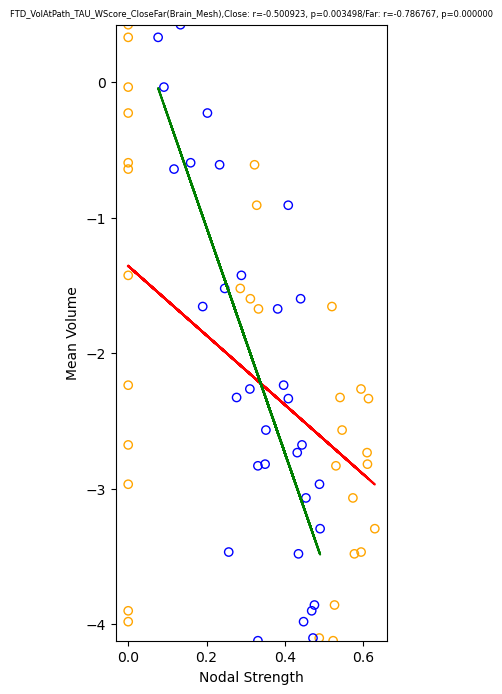

In [42]:
ns.nonZeroDegCorrCloseFar(TAUVolumeAtPath_w_Drop, cov_volAtPath_w_dict_Drop["TAU"], 
                  connection_at_path_list_TAU,
                  ymin, ymax,
                  'FTD_VolAtPath_TAU_WScore_CloseFar(Brain_Mesh)', 
                  'Nodal Strength', 'Mean Volume', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_VolAtPath_WScore_(TAU)_CloseFar(Brain_Mesh)', 
                  linear_regression = True)

###### TAU (2 Connection)

In [43]:
connection_at_path_list_TAU_2 = strongConnection_adjMat(pathToAtlasIndex_list_TAU, thick_adj_matrix_2)

<Figure size 640x480 with 0 Axes>

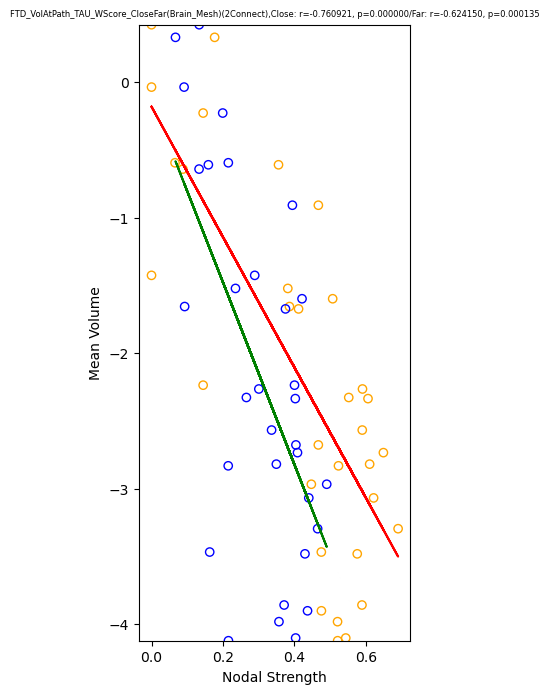

In [44]:
ns.nonZeroDegCorrCloseFar(TAUVolumeAtPath_w_Drop, cov_volAtPath_w_dict_Drop["TAU"], 
                  connection_at_path_list_TAU_2,
                  ymin, ymax,
                  'FTD_VolAtPath_TAU_WScore_CloseFar(Brain_Mesh)(2Connect)', 
                  'Nodal Strength', 'Mean Volume', 
                  outputDir = thickAtPath_Fig, 
                          outputName = 'FTD_NodalStrength_VolAtPath_WScore_(TAU)_CloseFar(Brain_Mesh)(2Connect)', 
                  linear_regression = True)

### TAU (3 Connection)

In [45]:
connection_at_path_list_TAU_3 = strongConnection_adjMat(pathToAtlasIndex_list_TAU, thick_adj_matrix_3)

<Figure size 640x480 with 0 Axes>

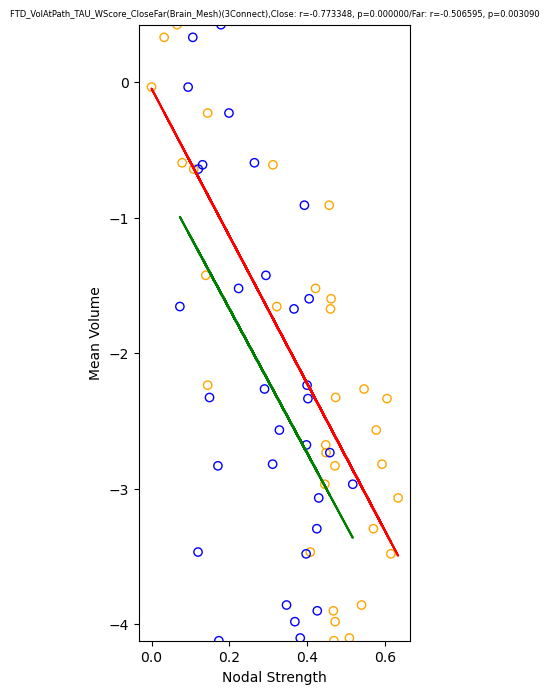

In [46]:
ns.nonZeroDegCorrCloseFar(TAUVolumeAtPath_w_Drop, cov_volAtPath_w_dict_Drop["TAU"], 
                  connection_at_path_list_TAU_3,
                  ymin, ymax,
                  'FTD_VolAtPath_TAU_WScore_CloseFar(Brain_Mesh)(3Connect)', 
                  'Nodal Strength', 'Mean Volume', 
                  outputDir = thickAtPath_Fig, 
                          outputName = 'FTD_NodalStrength_VolAtPath_WScore_(TAU)_CloseFar(Brain_Mesh)(3Connect)', 
                  linear_regression = True)

### TAU (4 Connection)

In [47]:
connection_at_path_list_TAU_4 = strongConnection_adjMat(pathToAtlasIndex_list_TAU, thick_adj_matrix_4)

<Figure size 640x480 with 0 Axes>

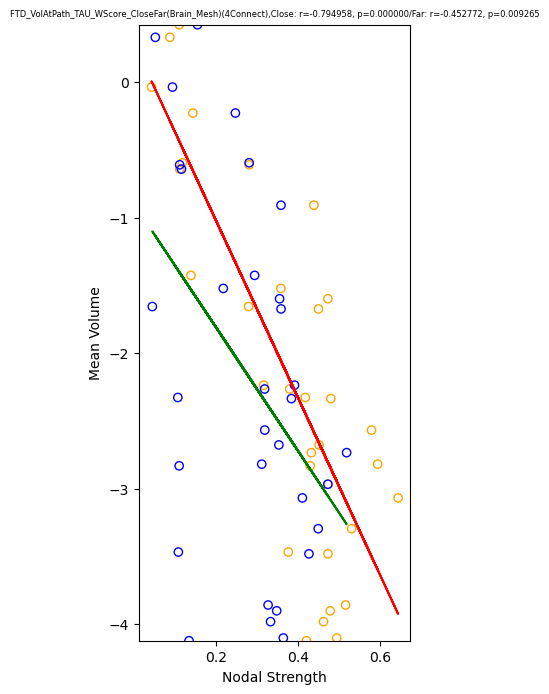

In [48]:
ns.nonZeroDegCorrCloseFar(TAUVolumeAtPath_w_Drop, cov_volAtPath_w_dict_Drop["TAU"], 
                  connection_at_path_list_TAU_4,
                  ymin, ymax,
                  'FTD_VolAtPath_TAU_WScore_CloseFar(Brain_Mesh)(4Connect)', 
                  'Nodal Strength', 'Mean Volume', 
                  outputDir = thickAtPath_Fig, 
                          outputName = 'FTD_NodalStrength_VolAtPath_WScore_(TAU)_CloseFar(Brain_Mesh)(4Connect)', 
                  linear_regression = True)

### TAU (5 Connection)

In [49]:
connection_at_path_list_TAU_5 = strongConnection_adjMat(pathToAtlasIndex_list_TAU, thick_adj_matrix_5)

<Figure size 640x480 with 0 Axes>

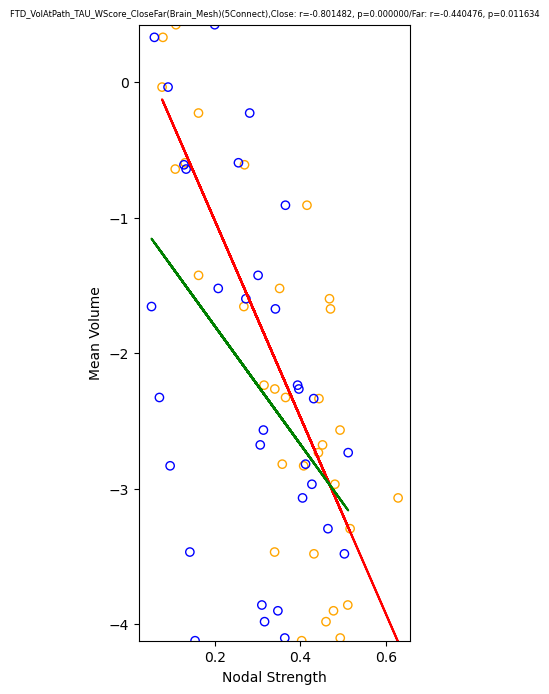

In [50]:
ns.nonZeroDegCorrCloseFar(TAUVolumeAtPath_w_Drop, cov_volAtPath_w_dict_Drop["TAU"], 
                  connection_at_path_list_TAU_5,
                  ymin, ymax,
                  'FTD_VolAtPath_TAU_WScore_CloseFar(Brain_Mesh)(5Connect)', 
                  'Nodal Strength', 'Mean Volume', 
                  outputDir = thickAtPath_Fig, 
                          outputName = 'FTD_NodalStrength_VolAtPath_WScore_(TAU)_CloseFar(Brain_Mesh)(54Connect)', 
                  linear_regression = True)

### TDP (1 Connection)

In [51]:
connection_at_path_list_TDP = strongConnection_adjMat(pathToAtlasIndex_list_TDP, thick_adj_matrix_1)

<Figure size 640x480 with 0 Axes>

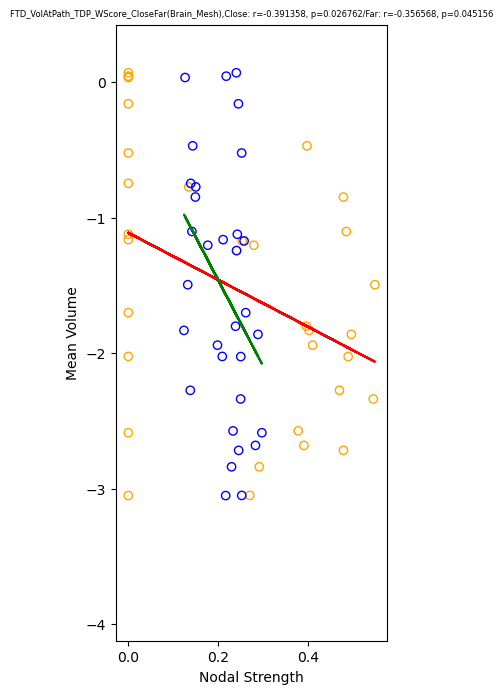

In [52]:
ns.nonZeroDegCorrCloseFar(TDPVolumeAtPath_w_Drop, cov_volAtPath_w_dict_Drop["TDP"], 
                          connection_at_path_list_TDP,
                          ymin, ymax,                  
                          'FTD_VolAtPath_TDP_WScore_CloseFar(Brain_Mesh)',                   
                          'Nodal Strength', 'Mean Volume', 
                          outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_VolAtPath_WScore_(TDP)_CloseFar(Brain_Mesh)', 
                          linear_regression = True)

### TDP (2 Connection)

In [53]:
connection_at_path_list_TDP_2 = strongConnection_adjMat(pathToAtlasIndex_list_TDP, thick_adj_matrix_2)

<Figure size 640x480 with 0 Axes>

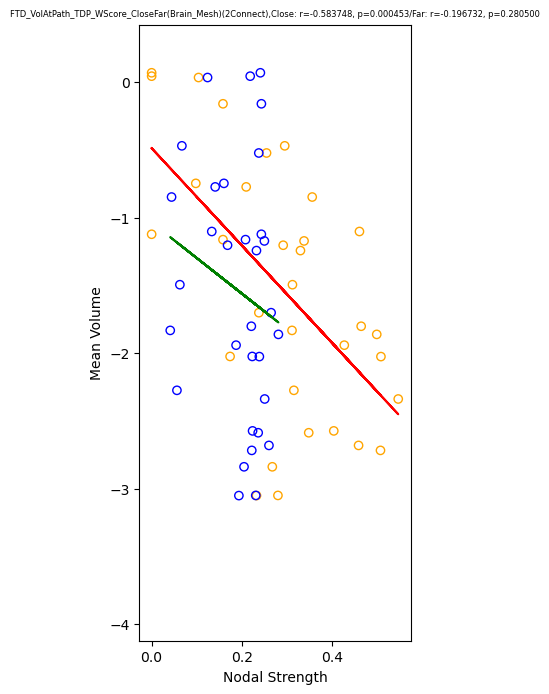

In [54]:
ns.nonZeroDegCorrCloseFar(TDPVolumeAtPath_w_Drop, cov_volAtPath_w_dict_Drop["TDP"], 
                          connection_at_path_list_TDP_2,
                          ymin, ymax,                  
                          'FTD_VolAtPath_TDP_WScore_CloseFar(Brain_Mesh)(2Connect)',                   
                          'Nodal Strength', 'Mean Volume', 
                          outputDir = thickAtPath_Fig, 
                          outputName = 'FTD_NodalStrength_VolAtPath_WScore_(TDP)_CloseFar(Brain_Mesh)(2Connect)', 
                          linear_regression = True)

### TDP (3 Connection)

In [55]:
connection_at_path_list_TDP_3 = strongConnection_adjMat(pathToAtlasIndex_list_TDP, thick_adj_matrix_3)

<Figure size 640x480 with 0 Axes>

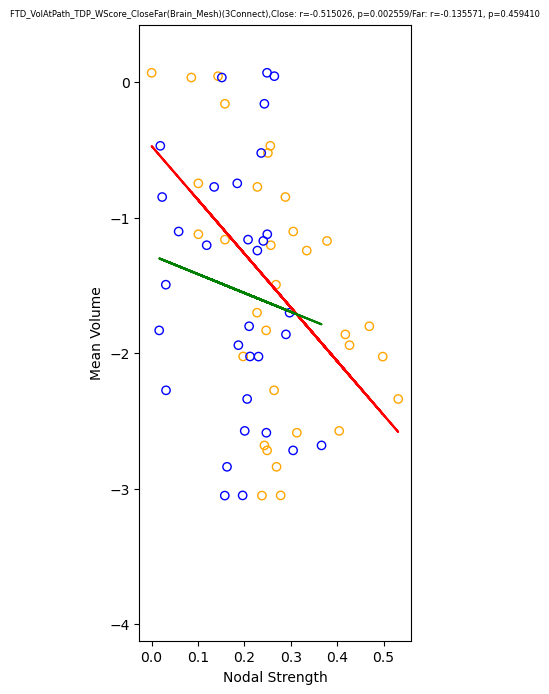

In [56]:
ns.nonZeroDegCorrCloseFar(TDPVolumeAtPath_w_Drop, cov_volAtPath_w_dict_Drop["TDP"], 
                          connection_at_path_list_TDP_3,
                          ymin, ymax,                  
                          'FTD_VolAtPath_TDP_WScore_CloseFar(Brain_Mesh)(3Connect)',                   
                          'Nodal Strength', 'Mean Volume', 
                          outputDir = thickAtPath_Fig, 
                          outputName = 'FTD_NodalStrength_VolAtPath_WScore_(TDP)_CloseFar(Brain_Mesh)(3Connect)', 
                          linear_regression = True)

### TDP (4 Connection)

In [57]:
connection_at_path_list_TDP_4 = strongConnection_adjMat(pathToAtlasIndex_list_TDP, thick_adj_matrix_4)

<Figure size 640x480 with 0 Axes>

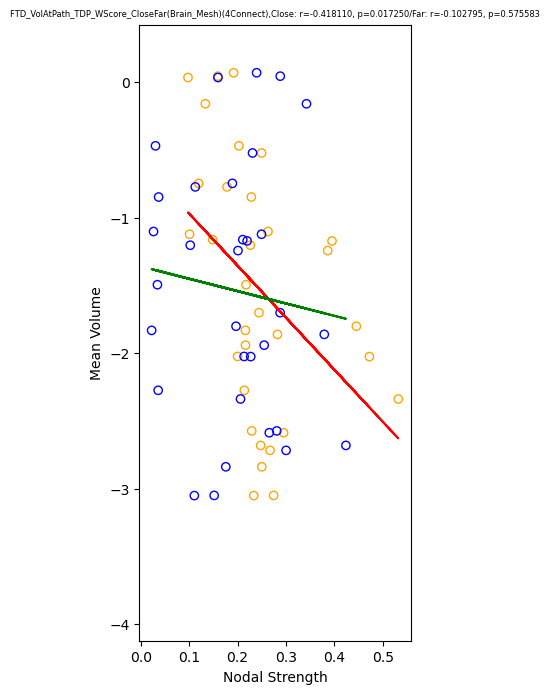

In [58]:
ns.nonZeroDegCorrCloseFar(TDPVolumeAtPath_w_Drop, cov_volAtPath_w_dict_Drop["TDP"], 
                          connection_at_path_list_TDP_4,
                          ymin, ymax,                  
                          'FTD_VolAtPath_TDP_WScore_CloseFar(Brain_Mesh)(4Connect)',                   
                          'Nodal Strength', 'Mean Volume', 
                          outputDir = thickAtPath_Fig, 
                          outputName = 'FTD_NodalStrength_VolAtPath_WScore_(TDP)_CloseFar(Brain_Mesh)(4Connect)', 
                          linear_regression = True)

### TDP (5 Connection)

In [59]:
connection_at_path_list_TDP_5 = strongConnection_adjMat(pathToAtlasIndex_list_TDP, thick_adj_matrix_5)

<Figure size 640x480 with 0 Axes>

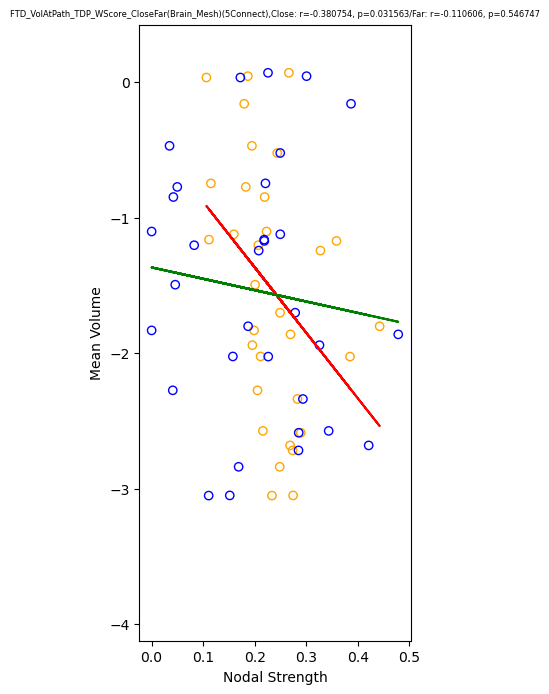

In [60]:
ns.nonZeroDegCorrCloseFar(TDPVolumeAtPath_w_Drop, cov_volAtPath_w_dict_Drop["TDP"], 
                          connection_at_path_list_TDP_5,
                          ymin, ymax,                  
                          'FTD_VolAtPath_TDP_WScore_CloseFar(Brain_Mesh)(5Connect)',                   
                          'Nodal Strength', 'Mean Volume', 
                          outputDir = thickAtPath_Fig, 
                          outputName = 'FTD_NodalStrength_VolAtPath_WScore_(TDP)_CloseFar(Brain_Mesh)(5Connect)', 
                          linear_regression = True)